### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [127]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [128]:
#model.compile(optimizer='adam',
 #             loss='sparse_categorical_crossentropy',
  #            metrics=['accuracy'])

In [129]:
data = keras.datasets.cifar10
#print(keras.datasets.cifar10.load_data())
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [130]:
# data analysis
print(f"train images shape: {train_images.shape}")
print(f"train labes shape: {train_labels.shape}")

print(f"test images shape: {test_images.shape}")
print(f"test labes shape: {test_labels.shape}")

train images shape: (50000, 32, 32, 3)
train labes shape: (50000, 1)
test images shape: (10000, 32, 32, 3)
test labes shape: (10000, 1)


In [131]:
from skimage.color import rgb2gray

# transform 3D images to 2D
train_images = rgb2gray(train_images)
train_images.shape

(50000, 32, 32)

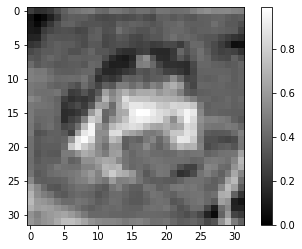

In [132]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.gray)
plt.colorbar()
plt.grid(False)

plt.show()

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [133]:
# model 1
model = keras.Sequential([
    keras.layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 1), 
                        padding="valid"),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                57632     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 58,042
Trainable params: 58,042
Non-trainable params: 0
__________________________________________________

In [134]:
train_images = np.expand_dims(train_images, axis=-1) 
print(train_images.shape)

(50000, 32, 32, 1)


In [112]:
# training the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8314 - accuracy: 0.3469
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5429 - accuracy: 0.4619
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4434 - accuracy: 0.4989
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3818 - accuracy: 0.5193
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3384 - accuracy: 0.5336
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3060 - accuracy: 0.5476
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2784 - accuracy: 0.5560
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2510 - accuracy: 0.5647
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2328 - accuracy: 0.5705
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.212

In [135]:
test_images = rgb2gray(test_images) 
test_images = np.expand_dims(test_images, axis=-1) 

test_images.shape

In [138]:
# Accuracy 
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 2.3411 - accuracy: 0.0985

Test accuracy: 0.09849999845027924


2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [101]:
# model 2
model_2 = keras.Sequential([
    keras.layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 1), 
                        padding="valid"),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                28816     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [139]:
model_2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8666 - accuracy: 0.3231
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6120 - accuracy: 0.4261
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5085 - accuracy: 0.4656
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4548 - accuracy: 0.4871
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4152 - accuracy: 0.5005
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3891 - accuracy: 0.5123
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3630 - accuracy: 0.5207
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3501 - accuracy: 0.5275
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3295 - accuracy: 0.5363
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.317

In [140]:
# Accuracy 
test_loss_2, test_acc_2 = model_2.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc_2)

313/313 - 0s - loss: 1.3425 - accuracy: 0.5336

Test accuracy: 0.5335999727249146


In [141]:
print(f"The first model gives a lost of {test_loss} and the second {test_loss_2}. The first model gives an accuracy of {test_acc} and the second {test_acc_2}. The first model is more accurate, so an extra dense layer is not required.")

The first model gives a lost of 2.3411097526550293 and the second 1.3425198793411255. The first model gives an accuracy of 0.09849999845027924 and the second 0.5335999727249146. The first model is more accurate, so an extra dense layer is not required.


### 2.

Entrena la red neuronal 1 pero esta vez con las imágenes a color.

In [160]:
(train_images_3, train_labels_3), (test_images_3, test_labels_3) = data.load_data()

In [161]:
train_images_3.shape

(50000, 32, 32, 3)

In [162]:
# Normalization
train_images_3 = train_images_3 / 255.0
test_images_3 = test_images_3 / 255.0

In [163]:
# model 3
model_3 = keras.Sequential([
    keras.layers.Conv2D(filters=8, 
                        kernel_size=(3, 3), 
                        input_shape=(32, 32, 3), 
                        padding="valid"),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
model_3.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 8)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1800)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 32)                57632     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                330       
Total params: 58,186
Trainable params: 58,186
Non-trainable params: 0
_________________________________________________

In [164]:
model_3.fit(train_images_3, train_labels_3, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6263 - accuracy: 0.4261
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4040 - accuracy: 0.5073
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2973 - accuracy: 0.5458
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2333 - accuracy: 0.5669
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1848 - accuracy: 0.5848
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1519 - accuracy: 0.5976
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1219 - accuracy: 0.6037
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0990 - accuracy: 0.6161
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0798 - accuracy: 0.6217
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.062

In [166]:
# Accuracy 
test_loss_3, test_acc_3 = model_3.evaluate(test_images_3, test_labels_3, verbose=2)

print('\nTest accuracy:', test_acc_3)

313/313 - 1s - loss: 1.1572 - accuracy: 0.5914

Test accuracy: 0.5914000272750854
